<a href="https://colab.research.google.com/github/FLC-ML/practicespace/blob/master/Time_Series_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RNN/LSTM Time Series Classification.

Proof of concept.

# Load Data

In [1]:
# Training Data
!wget https://www.dropbox.com/sh/gmgduvzyl5tken6/AAD6E17hrD8CfKwmRB9wfTKqa/X_reference.npy
!wget https://www.dropbox.com/sh/gmgduvzyl5tken6/AACaXFPq1qA5kLvhIF0Y0NfEa/y_reference.npy
# Testing Data
!wget https://www.dropbox.com/sh/gmgduvzyl5tken6/AABKsseO9QvObI4lTt-yXg8ta/X_test.npy
!wget https://www.dropbox.com/sh/gmgduvzyl5tken6/AACitgFQG5cfd7qs--swRbI0a/y_test.npy

--2020-07-14 19:54:27--  https://www.dropbox.com/sh/gmgduvzyl5tken6/AAD6E17hrD8CfKwmRB9wfTKqa/X_reference.npy
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/gmgduvzyl5tken6/AAD6E17hrD8CfKwmRB9wfTKqa/X_reference.npy [following]
--2020-07-14 19:54:28--  https://www.dropbox.com/sh/raw/gmgduvzyl5tken6/AAD6E17hrD8CfKwmRB9wfTKqa/X_reference.npy
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc53d13b1dea8b826969a31c1663.dl.dropboxusercontent.com/cd/0/inline/A7hDTsIKx7NC98iN4pX5lQS8UIJuOqS5mELurYHAKf3MkfV_ukbtXmFi68EhgiSVTl6WJcRIbR18ZJz89OMSHmO6sKQgSYjrUZAszEXM1I8ShWsEsII3uVDNzSY0X-4V_2g/file# [following]
--2020-07-14 19:54:29--  https://uc53d13b1dea8b826969a31c1663.dl.dropboxusercontent.com/cd/0/inline/A7hDTsIKx7NC98iN4pX5lQS8

In [2]:
# Importing libraries
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, LSTM, Dense, Flatten, GlobalMaxPool1D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

from sklearn.metrics import confusion_matrix
import itertools

import numpy as np
import matplotlib.pyplot as plt # Use pip install to get this outside of notebook
from matplotlib import cm
import pandas as pd

In [3]:
# If you want to check directory.
!ls

sample_data  X_reference.npy  X_test.npy  y_reference.npy  y_test.npy



new x_train shape: (60000, 1000, 1)
new x_test shape: (3000, 1000, 1)

X_data index shape: (1000, 1)
training set shape: (60000, 1000, 1) (60000,)
test set shape: (3000, 1000, 1) (3000,)
(array([   0,    1,    2, ..., 1997, 1998, 1999]),)
(array([2000, 2001, 2002, ..., 3997, 3998, 3999]),)


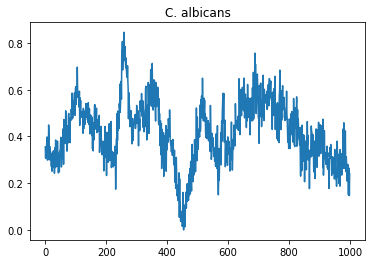

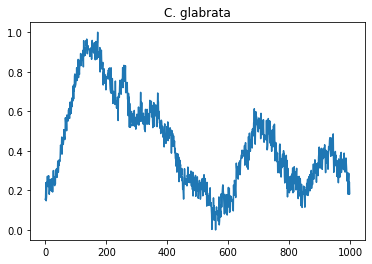

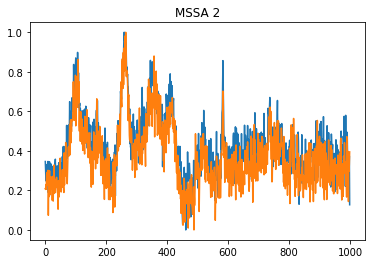

In [4]:
### Load the data:


# Training data load
X_train_loc = 'X_reference.npy'
y_train_loc = 'y_reference.npy'
X_train = np.load(X_train_loc)
y_train = np.load(y_train_loc)

# Testing data
X_test_loc = 'X_test.npy'
y_test_loc = 'y_test.npy'
X_test = np.load(X_test_loc)
y_test = np.load(y_test_loc)

# The data is only 2D
X_train = np.expand_dims(X_train, -1) 
X_test = np.expand_dims(X_test, -1)
print("\nnew x_train shape:", X_train.shape)
print("new x_test shape:", X_test.shape)
print("\nX_data index shape:", X_train[0].shape)

# Print shape of data loaded.
print("training set shape:", X_train.shape, y_train.shape)
print("test set shape:", X_test.shape, y_test.shape)

# Display where labels begin and end.
C_albicans = np.where(y_train==0)
C_glabrata = np.where(y_train==1)
print(C_albicans)
print(C_glabrata)

# Example Plots of signals
plt.figure()
plt.title("C. albicans")
plt.plot(X_train[0])
plt.figure()
plt.title("C. glabrata")
plt.plot(X_train[2000])
plt.figure()
plt.title("MSSA 2")
plt.plot(X_train[19000])
plt.plot(X_train[19005])

UPDATE: The labels are changing every 2000 spectra! 3000 spectra for each isolate.

In [5]:
### Build the Model
i = Input(shape=X_train[0].shape)
x = LSTM(1000, return_sequences=True)(i)
x = GlobalMaxPool1D()(x) # Need to use strided convolutions instead.
x = Dense(30, activation='softmax')(x)

model = Model(i, x)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1000, 1)]         0         
_________________________________________________________________
lstm (LSTM)                  (None, 1000, 1000)        4008000   
_________________________________________________________________
global_max_pooling1d (Global (None, 1000)              0         
_________________________________________________________________
dense (Dense)                (None, 30)                30030     
Total params: 4,038,030
Trainable params: 4,038,030
Non-trainable params: 0
_________________________________________________________________


In [7]:
### Compile and train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1)


1875/1875 [==============================] - 533s 284ms/step - loss: 2.9730 - accuracy: 0.1110 - val_loss: 3.4132 - val_accuracy: 0.0547


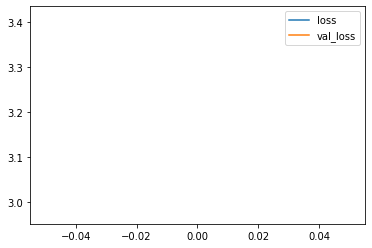

In [8]:
### Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

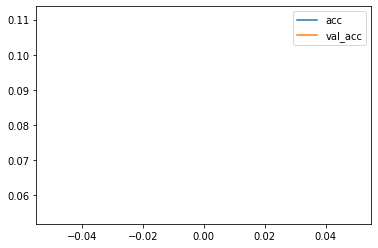

In [9]:
### Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[ 0  1  0  0  0  0  0  0  0  0  0  4 13  0 10  0  0  0  0  0 11  0  0  0
   0 61  0  0  0  0]
 [ 0 22  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0 54  4  0  0
   0 10  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  3 15  0 14  0  0  0  0  0  4  1  0  0
   0 63  0  0  0  0]
 [ 0  3  0  0  0  0  0  0  0  0  0  0 29  1  1  0  0  0  0  0 24  0  0  0
   0 42  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 16  0  2  0  0  0  0  0 13  0  0  0
   0 69  0  0  0  0]
 [ 0 11  0  0  0  0  0  0  0  0  0  0 15  1  2  0  0  0  0  0 52  2  0  0
   0 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 18  0  0 46  0  0  0  0  0  0  0  0  0
   0 36  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 33  0  0 41  0  0  0  0  0  0  0  0  0
   0 26  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  6  3  0 26  0  0  0  0  0  3  0  0  0
   0 62  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  3  3  0 25  0  0  0  0  0  5  0  0  0
   0 64  0  0  0  0]
 [ 0  0  0

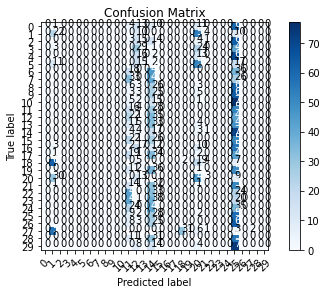

(30, 30)

In [10]:
# Plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(30)))

cm.shape

In [20]:
# Label mapping
labels = '''C_albicans
C_glabrata
K_aerogenes
E_coli_1
E_coli_2
E_faecium
E_faecalis_1
E_faecalis_2
E_cloacae
K_pneumoniae_1
K_pneumoniae_2
P_mirabilis
P_aeruginosa_1
P_aeruginosa_2
MSSA_1
MSSA_3
MRSA_1
MRSA_2
MSSA_2
S_enterica
S_epidermidis
S_lugdenensis
S_marcescens
S_pneumoniae_2
S_pneumoniae_1
S_sanguinis
Group_A_Strep.
Group_B_Strep
Group_C_Strep
Group_G_Strep'''.split()

Total misclassifications: 2836
Index of misclassified example: 1395


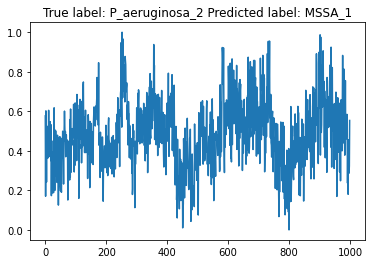

In [37]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
print('Total misclassifications:', len(misclassified_idx))
print('Index of misclassified example:',i)
#print(type(i))
# Changing float64 to int64
new_i = i.astype(int)
y_testnew = y_test.astype(int)
p_testnew = p_test.astype(int)
#print(type(new_i))
plt.plot(X_test[new_i])
plt.title("True label: %s Predicted label: %s" % (labels[y_testnew[new_i]], labels[p_testnew[new_i]]));